<a href="https://colab.research.google.com/github/LucasColas/ML01-Machine-Learning-for-everyone/blob/main/ML01_TD1%20-%20KNN%20and%20Nearest%20Centroid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised learning





## KNN

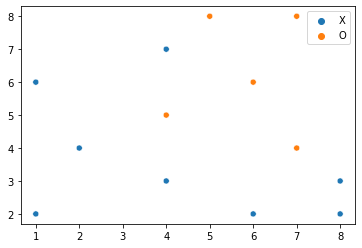

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
X = np.array([[8, 2],
       [4, 5],
       [4, 3],
       [7, 8],
       [2, 4],
       [7, 4],
       [1, 6],
       [8, 3],
       [6, 2],
       [5, 8],
       [4, 7],
       [6, 6],
       [1, 2]])
y = np.array(['X','O','X','O','X','O','X','X','X','O','X','O','X'])
labels = np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M'])

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)
plt.show()

In [7]:
X_train = X[:-3, :]
y_train = y[:-3]




In [17]:
X_test = X[-3:,:]
print(X_test)
y_test = y[-3:]

[[4 7]
 [6 6]
 [1 2]]


### 1NN

In [5]:
#1NN
def KNN_learner(X, y):
  """
  parameters
  X: dataset
  y : labels


  """
  
  def KNN(x):
    #print(np.linalg.norm(X-x, axis=1).argmin())
    return y[np.linalg.norm(X-x, axis=1).argmin()]
  
  return KNN



In [ ]:
KNN_1 = KNN_learner(X_train, y_train)
KNN_1(X[-3,:])

9


'O'

In [16]:
def predictions(X_test):
  y_hat = np.chararray(X_test.shape[0])
  for i in range(X_test.shape[0]):
    y_hat[i] = KNN_1(X_test[i,:])

  return y_hat

  

In [ ]:

y_hat = predictions(X_test)
print("y pred : ", y_hat)
print("y test : ", y_test)

In [ ]:
def error_rate(y_test, y_hat):
  return np.sum(y_test != y_hat)/y_test.shape[0]

print("error rate : ", math.floor(error_rate(y_test, y_hat)*100), "%")

error rate :  33 %


### KNN 

In [ ]:
def KNN_learner2(X, y, k = 1):
  """
  parameters
  X: dataset
  y : labels


  """
  
  def KNN(x):
  
     res = (y[np.linalg.norm(X-x, axis=1).argsort()[:k]]=="O").sum()
     return "O" if res > k//2 else "X"
  
  return KNN


In [ ]:
real_KNN = KNN_learner2(X_train, y_train, 3)
real_KNN(X[-1,:])

'X'

## Nearest Centroid

In [24]:
def NC_learner(X_train, y_train, labels=("X", "O")):
  n_labels = len(labels)
  centroids = np.zeros((n_labels, 2))
  
  for i in range(n_labels):
    centroids[i, 0] = np.mean(X_train[np.where(y_train == labels[i]), 0])
    centroids[i,1] = np.mean(X_train[np.where(y_train == labels[i]), 1])
  def NC(x):
    return labels[np.linalg.norm(centroids-x, axis=1).argmin()]
  return NC

In [25]:
NC = NC_learner(X_train, y_train)
#print(X_test[1,:])
NC(X_test[1,:])

[6 6]


'O'